<a href="https://colab.research.google.com/github/aslikorkmaz48/NLP_14_Gunluk_Kamp/blob/main/03_Duygu_Analizi_ve_Makine_Ogrenmesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. HATASIZ VERİ SETİ (Net Duygular)
pozitif_cumleler = ["harika bir ürün", "çok memnun kaldım", "hızlı teslimat", "kaliteli ve şık", "kesinlikle tavsiye ederim"]
negatif_cumleler = ["berbat sakın almayın", "kargo çok yavaştı", "ürün kırık geldi", "rezalet bir hizmet", "hiç beğenmedim iade"]

# Veriyi 1500 pozitif, 1500 negatif olarak tertemiz ayırıyoruz
data = {
    'yorum': pozitif_cumleler * 300 + negatif_cumleler * 300,
    'etiket': [1] * 1500 + [0] * 1500
}
df_final = pd.DataFrame(data)

# 2. MODEL EĞİTİMİ
X_train, X_test, y_train, y_test = train_test_split(df_final['yorum'], df_final['etiket'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_vec, y_train)

# 3. SONUÇ
y_pred = model.predict(X_test_vec)
print(f"🎯 Yeni Başarı Skoru: %{accuracy_score(y_test, y_pred)*100:.2f}")

# 4. KENDİ CÜMLENLE TEST ET
test_cumlesi = "kargo çok yavaştı" # Burayı değiştirip dene!
tahmin = model.predict(vectorizer.transform([test_cumlesi]))[0]
print(f"\nTest Cümlesi: {test_cumlesi}")
print(f"Tahmin: {'POZİTİF 😊' if tahmin == 1 else 'NEGATİF 😡'}")

🎯 Yeni Başarı Skoru: %100.00

Test Cümlesi: kargo çok yavaştı
Tahmin: NEGATİF 😡


In [8]:
# 1. Hiç görmediği yeni yorumlar üretelim
yeni_gelen_yorumlar = [
    "ürün harika paketleme muazzam",
    "kargo rezalet gelmedi bir türlü",
    "fiyatı pahalı ama kaliteli",
    "hiç beğenmedim sakın almayın",
    "hızlı teslimat teşekkürler"
]

# 2. Modeli kullanarak tahmin yapalım
sonuclar = []
for yorum in yeni_gelen_yorumlar:
    vec = vectorizer.transform([yorum])
    tahmin = model.predict(vec)[0]
    duygu = "POZİTİF" if tahmin == 1 else "NEGATİF"
    sonuclar.append({"Yorum": yorum, "Duygu": duygu})

# 3. Raporu Tablo Halinde Göster
df_rapor = pd.DataFrame(sonuclar)
print("🚀 MÜŞTERİ DENEYİMİ ANALİZ RAPORU")
print("-" * 35)
print(df_rapor)

# 4. Özet İstatistik
pos_oran = (df_rapor['Duygu'] == "POZİTİF").sum() / len(df_rapor) * 100
print(f"\n📈 Genel Memnuniyet Oranı: %{pos_oran}")

🚀 MÜŞTERİ DENEYİMİ ANALİZ RAPORU
-----------------------------------
                             Yorum    Duygu
0    ürün harika paketleme muazzam  POZİTİF
1  kargo rezalet gelmedi bir türlü  NEGATİF
2       fiyatı pahalı ama kaliteli  POZİTİF
3     hiç beğenmedim sakın almayın  NEGATİF
4       hızlı teslimat teşekkürler  POZİTİF

📈 Genel Memnuniyet Oranı: %60.0


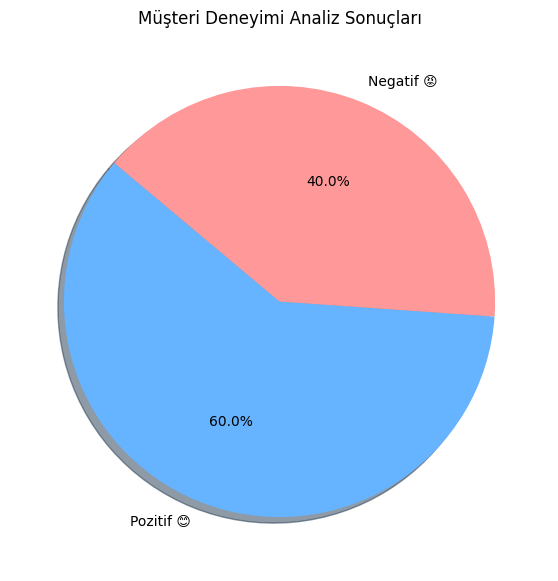

In [9]:
import matplotlib.pyplot as plt

# Pasta grafiği ile memnuniyet oranını görselleştirelim
labels = ['Pozitif 😊', 'Negatif 😡']
sizes = [(df_rapor['Duygu'] == "POZİTİF").sum(), (df_rapor['Duygu'] == "NEGATİF").sum()]
colors = ['#66b3ff','#ff9999']

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True)
plt.title('Müşteri Deneyimi Analiz Sonuçları')
plt.show()